# 📊Visualizing Correlation and Trends with Heatmaps
**Author:** *Your Name Here*

Welcome! In this short lesson we'll learn how to turn plain numbers into **colorful heatmaps and cluster maps** that reveal patterns at a glance.

> **Goal:** By the end, you'll know how to build, read, and customize heat‑map style visualizations in Python using Seaborn & Matplotlib – no prior experience required.

### Setup
Let's start by importing the libraries we'll use. If you don't have Seaborn yet, run `pip install seaborn` in a cell.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# optional: nicer Matplotlib defaults
plt.style.use('ggplot')

sns.set_context('talk')  # slightly larger fonts for presentations

### Sample data sets
We'll play with two small, built‑in Seaborn data sets:

* **`tips`** – restaurant bills and gratuities
* **`flights`** – monthly passenger totals from 1949‑1960

In [2]:
flights = sns.load_dataset('flights')
display(flights.head())

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
tips   = sns.load_dataset('tips')
display(tips.head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Correlation matrix
Heatmaps shine when we want to see *how numeric columns relate to each other*. The standard first step is to calculate a **correlation matrix** – numbers ranging from −1 to +1.

In [4]:
# pick only numeric columns we care about
num_cols = ['total_bill', 'tip', 'size']
correlation = tips[num_cols].corr()
correlation

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


### Basic heatmap
A heatmap paints each cell with a color that encodes the value. `annot=True` writes the numbers on top so beginners can connect the colors back to concrete values.

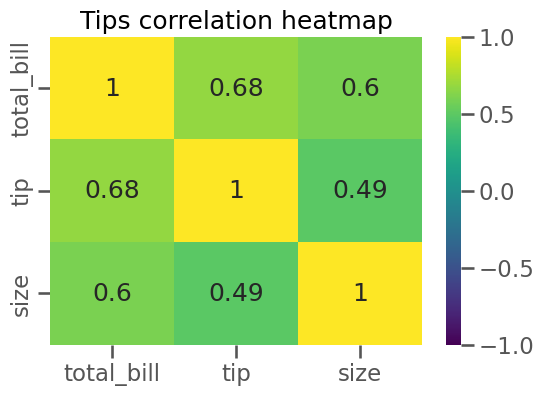

In [5]:
plt.figure(figsize=(6,4))
ax = sns.heatmap(correlation, annot=True, cmap='viridis', vmin=-1, vmax=1)
ax.set_title('Tips correlation heatmap');
plt.show()

> **Reading the plot**
>
> * **Color legend** ranges from dark purple (−1, perfect negative) to yellow (+1, perfect positive).
> * The diagonal is always 1.00 because each column is perfectly correlated with itself.
> * The darker green 0.56 between *total_bill* and *tip* says bigger bills tend to receive bigger tips – but not perfectly.

###  Cluster map
If we believe some variables group together, a **cluster map** automatically reorders rows/columns to place similar ones side‑by‑side.

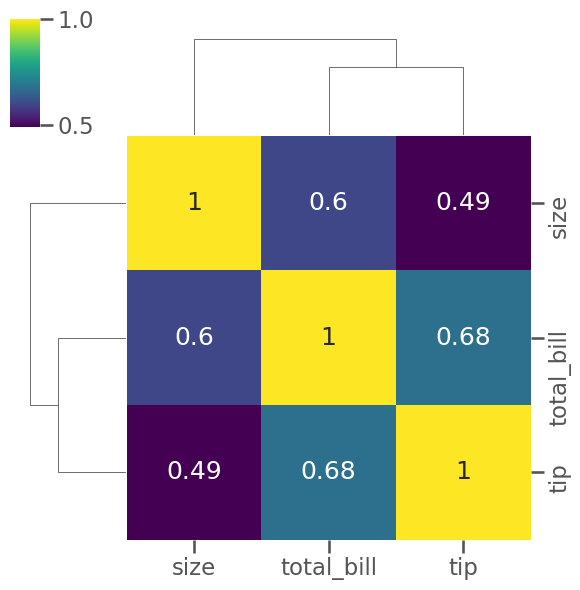

In [6]:
sns.clustermap(correlation, annot=True, cmap='viridis', figsize=(6,6));

> The dendrograms (trees) show similarity distances. Beginners can safely ignore the math – just notice how related columns are grouped.

### Monthly passengers heatmap
The `flights` data set is perfect for a time‑series style heat map. First we reshape rows→columns with `pivot_table()`.

In [7]:
flight_pivot = flights.pivot_table(index='month', columns='year', values='passengers')
flight_pivot.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15612\117416835.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flight_pivot = flights.pivot_table(index='month', columns='year', values='passengers')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0


### Plot

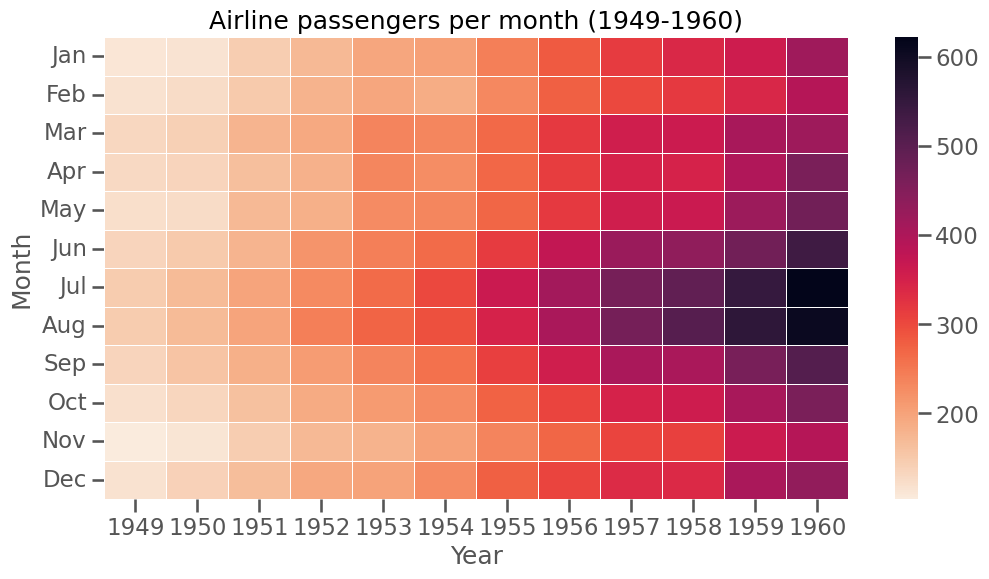

In [8]:
plt.figure(figsize=(12,6))
ax = sns.heatmap(flight_pivot, cmap='rocket_r', linewidths=.5)
ax.set_title('Airline passengers per month (1949‑1960)');
ax.set_xlabel('Year');
ax.set_ylabel('Month');
plt.show()

> **Take‑aways**
> * Summer months (July–August) have the darkest colors ⇒ peak travel season.
> * Growth over years shows as a drift from pale to dark overall.

### ✅Key points
1. Start with tidy data ↠ compute a correlation matrix / pivot table.
2. `sns.heatmap()` for simple rectangular color plots. Use `annot`, sensible `cmap`, `vmin/vmax`.
3. `sns.clustermap()` adds automatic grouping.
4. Label axes and give the figure an explicit title.

🎉 **That's it – visualize, don't memorize!** Feel free to tweak colors (`cmap`) or add more annotations to make the story clearer.

## 🚀 Next Steps
- Learn this file **regression.ipynb**